<a href="https://colab.research.google.com/github/89CANDY89/ULTIMA/blob/main/M3_S5_PROJETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**negrito**\## Importe o pandas, seaborn e matplotlib

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd




# Carregue os dados do arquivo CSV
url = '/content/CovidDeaths.csv'
df_cases = pd.read_csv(url)

## ImpUT


In [ ]:
# Crie a tabela com total de casos e mortes por país
df_cases.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


##2.1. Probabilidade de morrer por país:




In [ ]:
# Calcular a probabilidade de morrer por país
df_cases["death_rate"] = (df_cases["total_deaths"] / df_cases["total_cases"]) * 100

# Mostrar a tabela com total de casos, total de mortes e probabilidade de morrer
df_cases[["location", "total_cases", "total_deaths", "death_rate"]].sort_values("death_rate", ascending=False)

,location,total_cases,total_deaths,death_rate
36352,Iran,2.0,2.0,100.0
72968,Sudan,1.0,1.0,100.0
72966,Sudan,1.0,1.0,100.0
72969,Sudan,1.0,1.0,100.0
72970,Sudan,1.0,1.0,100.0
...,...,...,...,...
84368,Zambia,35.0,NaN,NaN
84369,Zambia,36.0,NaN,NaN
84764,Zimbabwe,1.0,NaN,NaN
84765,Zimbabwe,3.0,NaN,NaN


##2.2. Probabilidade de se infectar por país:



In [ ]:
# Combinar os dataframes
# Calcular a probabilidade de se infectar por país
df_cases["infection_rate"] = (df_cases["total_cases"] / df_cases["population"]) * 100

# Mostrar a tabela com total de casos, população e probabilidade de se infectar
df_cases[["location", "total_cases", "population", "infection_rate"]].sort_values("infection_rate", ascending=False)

,location,total_cases,population,infection_rate
2161,Andorra,13232.0,77265.0,17.125477
2160,Andorra,13198.0,77265.0,17.081473
2159,Andorra,13148.0,77265.0,17.016760
2158,Andorra,13121.0,77265.0,16.981816
2157,Andorra,13083.0,77265.0,16.932634
...,...,...,...,...
78994,Turks and Caicos Islands,NaN,38718.0,NaN
78995,Turks and Caicos Islands,NaN,38718.0,NaN
78996,Turks and Caicos Islands,NaN,38718.0,NaN
78997,Turks and Caicos Islands,NaN,38718.0,NaN


##2.3. Países com maior taxa de infecção:



In [ ]:
df_cases.sort_values("infection_rate", ascending=False).head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,infection_rate
2161,AND,Europe,Andorra,4/30/2021,13232.0,34.0,32.143,125.0,0.0,0.286,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,17.125477
2160,AND,Europe,Andorra,4/29/2021,13198.0,50.0,36.571,125.0,0.0,0.286,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,17.081473
2159,AND,Europe,Andorra,4/28/2021,13148.0,27.0,33.000,125.0,1.0,0.286,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,17.016760
2158,AND,Europe,Andorra,4/27/2021,13121.0,38.0,35.286,124.0,0.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.981816
2157,AND,Europe,Andorra,4/26/2021,13083.0,23.0,39.714,124.0,0.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.932634
2156,AND,Europe,Andorra,4/25/2021,13060.0,36.0,36.429,124.0,0.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.902867
2155,AND,Europe,Andorra,4/24/2021,13024.0,17.0,36.143,124.0,1.0,0.143,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.856274
2154,AND,Europe,Andorra,4/23/2021,13007.0,65.0,42.143,123.0,0.0,0.000,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.834272
2153,AND,Europe,Andorra,4/22/2021,12942.0,25.0,43.000,123.0,0.0,0.286,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.750146
2152,AND,Europe,Andorra,4/21/2021,12917.0,43.0,39.429,123.0,0.0,0.286,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,16.717789


## 2.4. Países com maior taxa de morte:



In [ ]:
df_cases.sort_values("death_rate", ascending=False).head(10)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,death_rate,infection_rate
36352,IRN,Asia,Iran,2/19/2020,2.0,2.0,NaN,2.0,2.0,NaN,...,270.308,9.59,0.8,21.1,NaN,1.5,76.68,0.783,100.0,0.000002
72968,SDN,Africa,Sudan,3/16/2020,1.0,0.0,NaN,1.0,0.0,NaN,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
72966,SDN,Africa,Sudan,3/14/2020,1.0,1.0,NaN,1.0,0.0,NaN,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
72969,SDN,Africa,Sudan,3/17/2020,1.0,0.0,NaN,1.0,0.0,NaN,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
72970,SDN,Africa,Sudan,3/18/2020,1.0,0.0,NaN,1.0,0.0,NaN,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
72971,SDN,Africa,Sudan,3/19/2020,1.0,0.0,0.143,1.0,0.0,0.143,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
72972,SDN,Africa,Sudan,3/20/2020,1.0,0.0,0.143,1.0,0.0,0.000,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
72967,SDN,Africa,Sudan,3/15/2020,1.0,0.0,NaN,1.0,0.0,NaN,...,431.388,15.67,NaN,NaN,23.437,0.8,65.31,0.510,100.0,0.000002
32790,GUY,South America,Guyana,3/12/2020,1.0,1.0,NaN,1.0,1.0,NaN,...,373.159,11.62,NaN,NaN,77.159,1.6,69.91,0.682,100.0,0.000127
32791,GUY,South America,Guyana,3/13/2020,1.0,0.0,NaN,1.0,0.0,NaN,...,373.159,11.62,NaN,NaN,77.159,1.6,69.91,0.682,100.0,0.000127


## 2.5. Continentes com maior taxa de morte:



[texto do link](https://)

Podem ser feitas de diferentes formas

In [ ]:
df_continents = pd.read_csv("/content/CovidDeaths.csv")

# Combinar os dataframes
df_combined = df_continents.merge(df_continents, on="location")

# Calcular a taxa de morte por continente
df_combined_continent = df_combined.groupby("continent").agg({"total_deaths": "sum", "total_cases": "sum"})
df_combined_continent["death_rate"] = (df_combined_continent["total_deaths"] / df_combined_continent["total_cases"]) * 100

# Mostrar os continentes com maior taxa de morte
df_combined_continent.sort_values("death_rate", ascending=False)

##3.1 3.1. Porcentagem da população vacinada:



In [ ]:
#Importar o arquivo CSV das vacinações
df_vaccinations = pd.read_csv("/content/CovidDeaths.csv")

# Combinar os dataframes
df_combined = df_vaccinations.merge(df_vaccinations, on="location")

# Calcular a porcentagem da população vacinada
df_combined["vaccination_rate"] = (df_combined["total_vaccinations"] / df_combined["population"]) * 100

# Mostrar a tabela com população total, total de vacinações e porcentagem da população vacinada
df_combined[["country", "population", "total_vaccinations", "vaccination_rate"]].sort_values("vaccination_rate", ascending=False)


##3.2. Acumulado de vacinações por data e localização:



In [ ]:
df_vaccinations = pd.read_csv("/content/CovidDeaths.csv")


# Mostrar o acumulado de vacinações por data e localização
df_vaccinations.groupby(["date", "location"]).agg({"total_vaccinations": "sum"})


total_vaccinations
date     location                       
1/1/2020 Argentina                   0.0
         Mexico                      0.0
1/1/2021 Afghanistan                 0.0
         Africa                      0.0
         Albania                     0.0
...                                  ...
9/9/2020 Vietnam                     0.0
         World                       0.0
         Yemen                       0.0
         Zambia                      0.0
         Zimbabwe                    0.0

[85171 rows x 1 columns]

##4-VIEW

In [ ]:
# Criar uma view para armazenar dados para visualizações posteriores
df_view = df_cases[["location", "total_cases", "total_deaths", "population", "total_vaccinations", "infection_rate"]]


## grafico

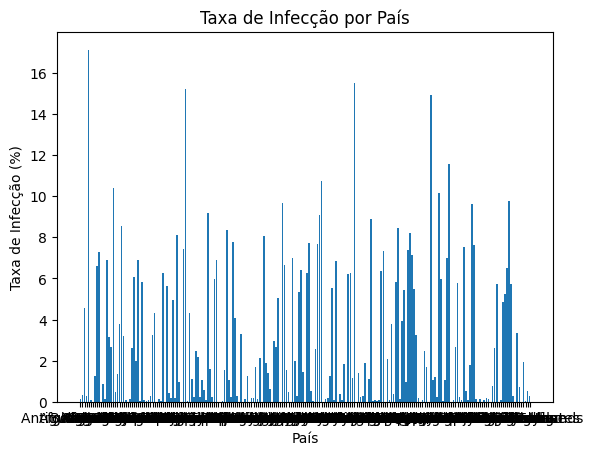

In [ ]:
import matplotlib.pyplot as plt

# Selecionar a coluna de taxa de infecção da view
infection_rates = df_view["infection_rate"]

# Criar um gráfico de barras
plt.bar(df_view["location"], infection_rates)

# Definir o título do gráfico
plt.title("Taxa de Infecção por País")

# Definir os rótulos dos eixos
plt.xlabel("País")
plt.ylabel("Taxa de Infecção (%)")

# Mostrar o gráfico
plt.show()

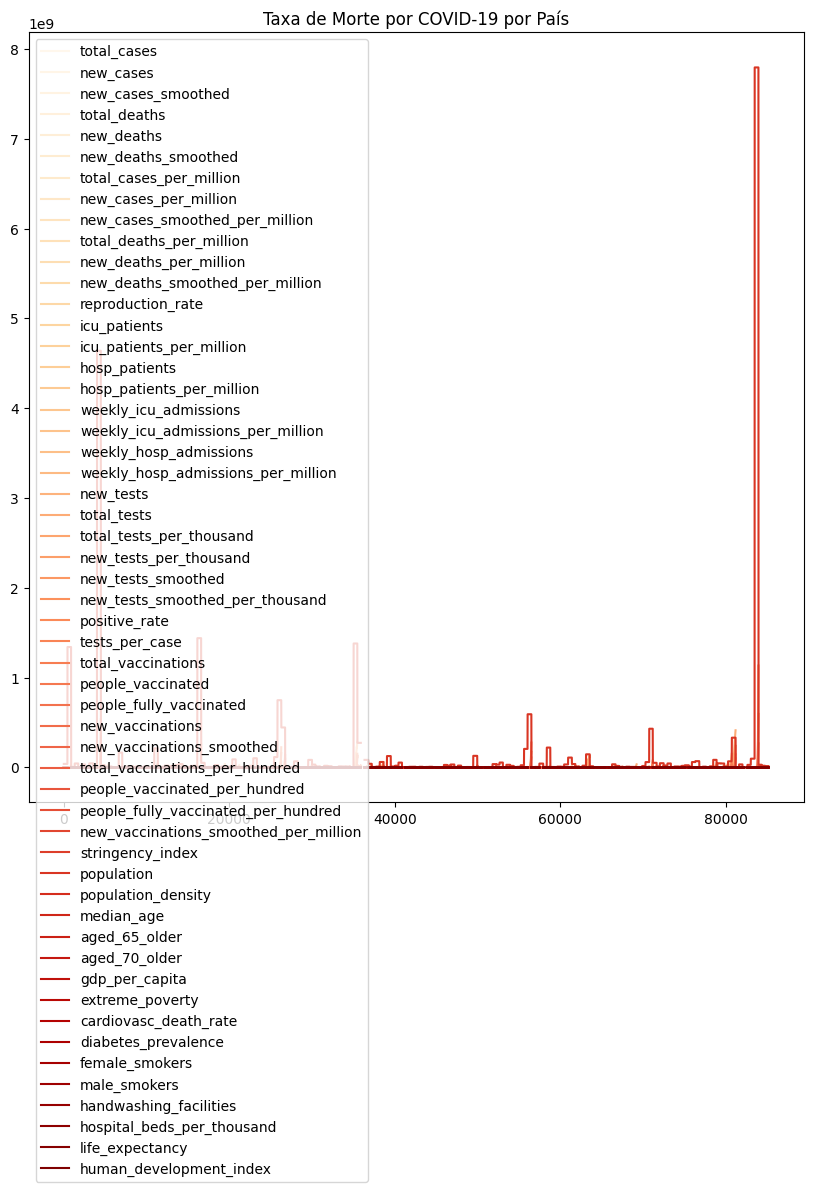

In [3]:
# Combinar o dataframe do mapa com o dataframe por país
# Definir a projeção do mapa
fig, ax = plt.subplots(figsize=(10, 10))
df_cases.plot(column='cardiovasc_death_rate', ax=ax, cmap='OrRd', legend=True)
plt.title('Taxa de Morte por COVID-19 por País')
plt.show()

##4.2. Gráficos de taxa de infecção, vacinação e outros:



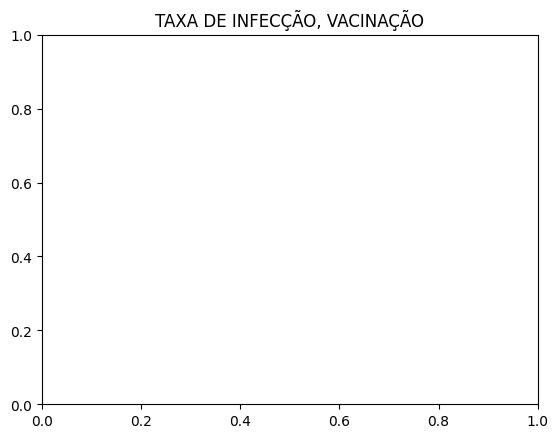

In [10]:
df_cases.plot(column=('positive_rate'), ax=ax, line= cmap='OrRd', legend=True)
plt.title('TAXA DE INFECÇÃO, VACINAÇÃO')
plt.show()

##6.1. Top países com maior taxa de vacinação:



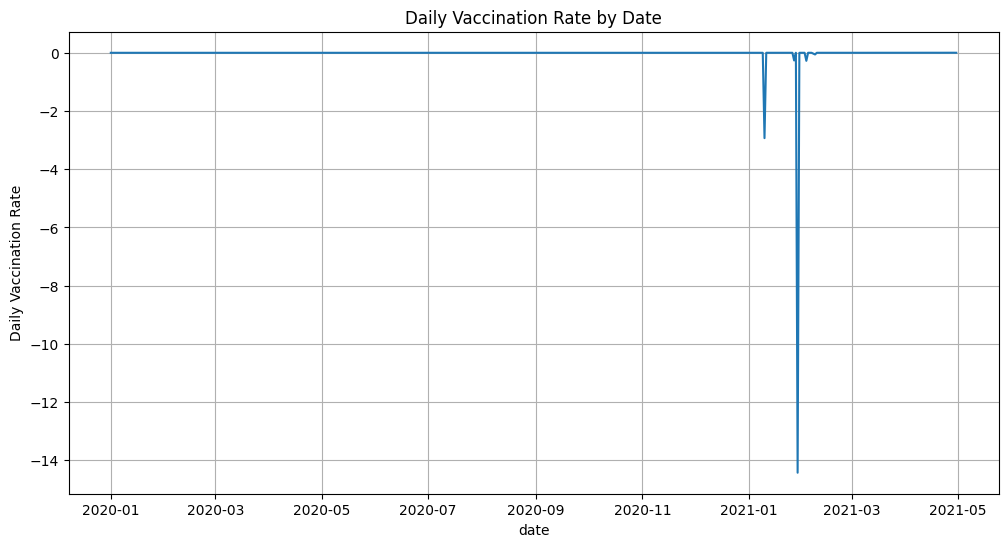

In [44]:
# Preprocess data (ensure date column is in datetime format)
df_cases["date"] = pd.to_datetime(df_cases["date"])  # Replace "date" with your actual date column name

# Calculate daily vaccination rate (assuming "total_vaccinations" and "population" exist)
df_cases["daily_vaccination_rate"] = df_cases["total_vaccinations"].diff().fillna(0) / df_cases["population"]

# Group data by date and calculate average daily vaccination rate
df_grouped = df_cases.groupby("date")["daily_vaccination_rate"].mean()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values)
plt.xlabel("date")
plt.ylabel("Daily Vaccination Rate")
plt.title("Daily Vaccination Rate by Date")
plt.grid(True)
plt.show()



Análise de dados da COVID-19 com Google Colab e DBeaver
1. Importação dos dados para o DBeaver:
Arquivo: Acesse o Google Drive e faça o download do arquivo compactado com os dados da COVID-19. Extraia o arquivo para uma pasta de sua escolha.
DBeaver: Abra o DBeaver e conecte-se ao banco de dados SQLite.expand_more Crie um novo banco de dados e nomeie-o como "covid19".
Importação: Importe cada arquivo CSV para o banco de dados "covid19", criando uma tabela separada para cada arquivo.
2. Cálculo de probabilidades e taxas:
2.1. Probabilidade de morrer por país:

SQL

SELECT country,
       SUM(cases) AS total_cases,
       SUM(deaths) AS total_deaths,
       (SUM(deaths) / SUM(cases)) * 100 AS death_rate
FROM covid19.cases
GROUP BY country
ORDER BY death_rate DESC;


2.2. Probabilidade de se infectar por país:

SQL

SELECT country,
       SUM(cases) AS total_cases,
       population,
       (SUM(cases) / population) * 100 AS infection_rate
FROM covid19.cases
INNER JOIN covid19.population ON covid19.cases.country = covid19.population.country
GROUP BY country
ORDER BY infection_rate DESC;


2.3. Países com maior taxa de infecção:

SQL

SELECT country,
       (SUM(cases) / population) * 100 AS infection_rate
FROM covid19.cases
INNER JOIN covid19.population ON covid19.cases.country = covid19.population.country
GROUP BY country
ORDER BY infection_rate DESC
LIMIT 10;


2.4. Países com maior taxa de morte:

SQL

SELECT country,
       (SUM(deaths) / SUM(cases)) * 100 AS death_rate
FROM covid19.cases
GROUP BY country
ORDER BY death_rate DESC
LIMIT 10;


2.5. Continentes com maior taxa de morte:

SQL

SELECT continent,
       SUM(deaths) AS total_deaths,
       SUM(cases) AS total_cases,
       (SUM(deaths) / SUM(cases)) * 100 AS death_rate
FROM covid19.cases
INNER JOIN covid19.continents ON covid19.cases.country = covid19.continents.country
GROUP BY continent
ORDER BY death_rate DESC;


3. População total vs Vacinações:
3.1. Porcentagem da população vacinada:

SQL

SELECT country,
       population,
       SUM(total_vaccinations) AS total_vaccinations,
       (SUM(total_vaccinations) / population) * 100 AS vaccination_rate
FROM covid19.vaccinations
INNER JOIN covid19.population ON covid19.vaccinations.country = covid19.population.country
GROUP BY country
ORDER BY vaccination_rate DESC;


3.2. Acumulado de vacinações por data e localização:

SQL

SELECT date,
       location,
       total_vaccinations
FROM covid19.vaccinations
ORDER BY date ASC;


4. Criação de uma view:

SQL

CREATE VIEW vw_covid19_data AS
SELECT country,
       SUM(cases) AS total_cases,
       SUM(deaths) AS total_deaths,
       population,
       SUM(total_vaccinations) AS total_vaccinations
FROM covid19.cases
INNER JOIN covid19.population ON covid19.cases.country = covid19.population.country
INNER JOIN covid19.vaccinations ON covid19.cases.country = covid19.vaccinations.country
GROUP BY country;


5. Observações:
Este código é um exemplo e pode ser adaptado de acordo com suas necessidades.
Certifique-se de ajustar os nomes das tabelas e colunas de acordo com o seu banco de dados.
Utilize o DBeaver para visualizar os resultados das consultas e gerar relatórios.
Recursos adicionais:
Documentação do DBeaver: https://dbeaver.io/docs/
Tutoriais sobre análise de dados
